# COVID  Case Study

## Milestone 2:  Normality test
The head of disease control wants to know which customers have the highest hit by COVID. The goal of this assignment is to check errors in numerical variables and correct them. 


### Learning outcomes 
- Find missing values
- apply normal test to check for normality. 


# Total: 70pts, weight: 15%

In [3]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
# load data
df_first = pd.read_csv('First_Dataset.csv')
df_second = pd.read_csv('Second_Dataset.csv')

"""
In terms of the second dataset, we created the daily count of the doses.
The calculation was subsituting the total doses count by one of the yesterday.
"""

'\nIn terms of the second dataset, we created the daily count of the doses.\nThe calculation was subsituting the total doses count by one of the yesterday.\n'

In [6]:
df_first.head()

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients
0,CAN,1/23/2020,2,2.0,NaN,NaN,NaN,NaN
1,CAN,1/24/2020,3,1.0,NaN,NaN,NaN,NaN
2,CAN,1/25/2020,3,0.0,NaN,NaN,NaN,NaN
3,CAN,1/26/2020,3,0.0,NaN,NaN,NaN,NaN
4,CAN,1/27/2020,3,0.0,NaN,NaN,NaN,NaN


In [7]:
df_second.head()

,pruid,prename,report_date,numtotal_all_administered,as_of_date,numtotal_dose1_administered,numtotal_dose2_administered,numtotal_dose3_administered,numtotal_dose4_administered,updated,num_dose1_daily_count,num_dose2_daily_count,num_dose3_daily_count,num_dose4_daily_count
0,1,Canada,1/19/2021,685801,1/19/2021,253039,16193,0,0,1,NaN,NaN,NaN,NaN
1,1,Canada,1/20/2021,727355,1/20/2021,259348,20119,0,0,1,6309.0,3926.0,0.0,0.0
2,1,Canada,1/21/2021,766466,1/21/2021,264637,27218,0,0,1,5289.0,7099.0,0.0,0.0
3,1,Canada,1/22/2021,799783,1/22/2021,267072,31526,0,0,1,2435.0,4308.0,0.0,0.0
4,1,Canada,1/23/2021,817229,1/23/2021,268561,34012,0,0,1,1489.0,2486.0,0.0,0.0


#### normality test 

    p <= alpha: reject H0, not normal.
    p > alpha: fail to reject H0, normal.

Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html


    1. Find the Kurtosis, zscore and pvalue of the 2 dataframes for different variables. Each team member can pick a variable in both dataframes to show the normal distribution and explain the scores [10pts]
    

### First dataset (ignore the Null value)

#### Code: Ran

In [46]:
# Kurtosis of "new_cases"
print("Kurtosis: ", stats.kurtosis(df_first['new_cases'].values, nan_policy='omit'))

# Z-score and P_value of "new_cases"
zscore, p = stats.kurtosistest(df_first['new_cases'].values, nan_policy='omit')
print("Z-score:", zscore)
print("P_value: ", p)

Kurtosis:  25.480661531654793
Z-score: 17.198713191721193
P_value:  2.714940096239284e-66


(array([833., 148.,  21.,   9.,   8.,   4.,   6.,   2.,   1.,   2.]),
 array([    0. ,  6367.8, 12735.6, 19103.4, 25471.2, 31839. , 38206.8,
        44574.6, 50942.4, 57310.2, 63678. ]),
 <BarContainer object of 10 artists>)

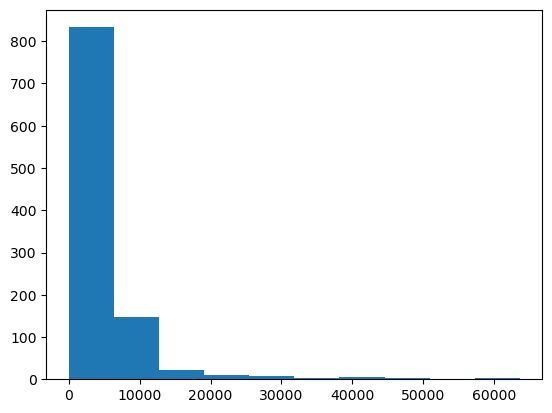

In [89]:
# show histogram of "new_cases"
plt.hist(df_first['new_cases'].values)

In [85]:
# Kurtosis of "new_deaths"
print("Kurtosis: ", stats.kurtosis(df_first['new_deaths'].values, nan_policy='omit'))

# Z-score and P_value of "new_deaths"
zscore, p = stats.kurtosistest(df_first['new_deaths'].values, nan_policy='omit')
print("Z-score:", zscore)
print("P_value: ", p)

Kurtosis:  1.710172822678813
Z-score: 6.409915807030484
P_value:  1.4560001969641317e-10


(array([464., 244.,  89.,  73.,  68.,  30.,  13.,   3.,   2.,   1.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <BarContainer object of 10 artists>)

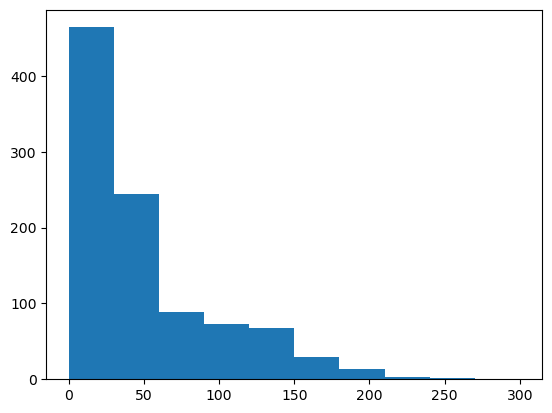

In [90]:
# show histogram of "new_deaths"
plt.hist(df_first['new_deaths'].values)

#### Observations of First Dataset
- The kurtosis of both variables in the first dataset were more than 1, which indicates that two variables were highly skewed.
- Also, the p-value of both variables are less than or equal to 0.05, which means that both variables are not normal.
- Considering the histogram of both variables, we can understand that they are not normaly distributed. 

### Second Dataset (ignore the Null value)

#### Code: Aleksandr

#### Observations of Second Dataset
- 
- 

#### Binning [10pts]

    2. Each team can pick 2 numerical variables to create binning.  Create a binning named combinedvariables_binned of the 2 columns in your file (mention them in your answers) and  give the percentile points in pcts. [5pts]  
pcts = [0, .25, .5, .75, 1].  
3.  Show the frequency table for the combinedvariables_binned variable. [5pts]


### First Dataset

#### Code: Ran

In [94]:
# define percentile points
pcts = [0, .25, .5, .75, 1]

# create empty DataFrame
combinedvariables_binned_1st = pd.DataFrame()

In [143]:
# Column: "icu_patients"
binned_ICU = pd.qcut(df_first['icu_patients'], q=pcts)
combinedvariables_binned_1st['icu_patients'] = binned_ICU

# frequency table
pd.crosstab(index=combinedvariables_binned_1st['icu_patients'], columns='Frequency')

col_0,Frequency
icu_patients,
"(41.999, 228.0]",247
"(228.0, 402.0]",236
"(402.0, 609.0]",241
"(609.0, 1387.0]",241


In [144]:
# Column: "hosp_patients"
binned_hosp = pd.qcut(df_first['hosp_patients'], q=pcts)
combinedvariables_binned_1st['hosp_patients'] = binned_hosp

# frequency table
pd.crosstab(index=combinedvariables_binned_1st['hosp_patients'], columns='Frequency')

col_0,Frequency
hosp_patients,
"(225.999, 1521.0]",242
"(1521.0, 2708.0]",241
"(2708.0, 4691.0]",242
"(4691.0, 11022.0]",240


### Second Dataset

#### Code: Aleksandr

In [ ]:
# create empty DataFrame
combinedvariables_binned_2nd = pd.DataFrame()

#### Missing values [10pts]

    4.  Count of missing values in each of the columns of 2 datasets.

### First Dataset

#### Code: Ran

In [145]:
# column: "icu_patients"
df_first['icu_patients'].isna().sum()

71

In [146]:
# column: "hosp_patients"
df_first['hosp_patients'].isna().sum()

71

### Second Dataset
#### Code: Aleksandr

#### 5. Calculate and print the median value foreach of the numerical variables in both the datasets? [10 pts]

### First Dataset

#### Code: Ran

In [167]:
for column in df_first:
    if (df_first[column].dtypes == 'float64' or (df_first[column].dtypes == 'int64'):
        print(f'{column}:', df_first[column].median())

total_cases: 1415943.0
new_cases: 2510.0
total_deaths: 26492.0
new_deaths: 32.0
icu_patients: 402.0
hosp_patients: 2708.0


### Second Dataset

#### Code: Aleksandr

#### 6. In a COVID dataset if you have an age missing value, replace the missing value with average ? If you don't have an age variable, pick a numerical column in both datasets and replace with the mean value.  [10 pts]

#### Code: Ran

In [178]:
# df: df_first, column: new_cases
print('Number of missing values: ', df_first['new_cases'].isna().sum())
mean = np.mean(df_first['new_cases'])
df_first['fillna_new_cases'] = df_first['new_cases'].fillna(mean)
print('Number of missing values after fillna: ', df_first['fillna_new_cases'].isna().sum())

Number of missing values:  2
Number of missing values after fillna:  0


#### 7.Outlier detection using Mean and standard deviation: Write 2 functions avg(), std_dev() to calculate average and standard deviation of a given series. Apply that function to show for atleast 2 columns in each of your dataset. [10 pts]

#### Code: Aleksandr

In [181]:
# define function "avg" 
def avg(x):
    return
    
# define function "std_dev"
def std_dev(x):
    return

# apply function



#### 8.Outlier detection: [20 pts]
a. Show the statistics for the age variable or vaccination or death rate (or pick one column in each dataset). 
b. Use the interquartile range to show the outliers for the selected column. [5pts]
     - also print the lower and upper fence values 
     - print the outliers subset. [10 pts]
c. Remove the outliers from the  dataframe.[5pts]
     

In [227]:
# (a): Show the basic statistics of number of deaths
df_first['new_deaths'].describe()

count    987.000000
mean      48.777102
std       49.038100
min        0.000000
25%       12.000000
50%       32.000000
75%       68.500000
max      300.000000
Name: new_deaths, dtype: float64

In [228]:
# (b): Show outlier subset
def outlier_subset(df, column, show_IQR=False):
    """ Return outlier subset based on interquartile range (IQR) """
    basis_stats = df[column].describe()
    upper_fence = basis_stats['75%']
    lower_fence = basis_stats['25%']
    if show_IQR == True:
        print("Upper Fence of IQR: ", upper_fence)
        print("Lower Fence of IQR: ", lower_fence)
    
    outlier_df = df.loc[(df[column] <= lower_fence) | (df[column] >= upper_fence)]
    return outlier_df

outlier_subset(df=df_first, column='new_deaths', show_IQR=True)

Upper Fence of IQR:  68.5
Lower Fence of IQR:  12.0


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients
46,CAN,3/9/2020,144,24.0,1.0,1.0,NaN,NaN
47,CAN,3/10/2020,165,21.0,1.0,0.0,NaN,NaN
48,CAN,3/11/2020,228,63.0,1.0,0.0,NaN,NaN
49,CAN,3/12/2020,289,61.0,1.0,0.0,NaN,NaN
50,CAN,3/13/2020,386,97.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1027,CAN,11/15/2022,4408841,4950.0,47419.0,135.0,252.0,5708.0
1028,CAN,11/16/2022,4411356,2515.0,47517.0,98.0,252.0,5702.0
1029,CAN,11/17/2022,4417357,6001.0,47661.0,144.0,245.0,5565.0
1031,CAN,11/19/2022,4419028,665.0,47688.0,6.0,255.0,5470.0


In [229]:
# (c): Removed outliers from the dataset
outliers = outlier_subset(df=df_first, column='new_deaths', show_IQR=False)
df_first.drop(outliers.index, inplace=True)
df_first.reset_index(inplace=True)
df_first

,index,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients
0,0,CAN,1/23/2020,2,2.0,NaN,NaN,NaN,NaN
1,1,CAN,1/24/2020,3,1.0,NaN,NaN,NaN,NaN
2,2,CAN,1/25/2020,3,0.0,NaN,NaN,NaN,NaN
3,3,CAN,1/26/2020,3,0.0,NaN,NaN,NaN,NaN
4,4,CAN,1/27/2020,3,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
521,1023,CAN,11/11/2022,4402177,1081.0,47272.0,32.0,261.0,5685.0
522,1030,CAN,11/18/2022,4418363,1006.0,47682.0,21.0,250.0,5475.0
523,1033,CAN,11/21/2022,4421434,1822.0,47717.0,29.0,267.0,5457.0
524,1034,CAN,11/22/2022,4422890,1456.0,47741.0,24.0,NaN,NaN
